# ■ Sample Code to handle 'node2vec_recursive_clustering.py'
## perform k-means clustering recursively to embedded vectors

In [1]:
import sys
#sys.path.append("C:/github/n2v_rc") # path for the package
sys.path.append("C:/github/n2v_rc/node2vec_recursive_clustering") # path for the module
import node2vec_recursive_clustering

C:\Users\Mizu2020\piphazuma\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
import pandas as pd
import networkx as nx

# load data
g = nx.read_gpickle('C:/github/n2v_rc/sample_data/sample_cor.gpickle')
vec_df = pd.read_csv('C:/github/n2v_rc/sample_data/sample_vec_df.csv',index_col=0)

whole network SPD : 11.925313230600343
KMenas with default KMeans++

20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 
--- K-Means with Q ---
sub graph nodes : 12436
sub graph edges : 31895
best split number : 32
its modularity (Q) : 0.9307745800593823


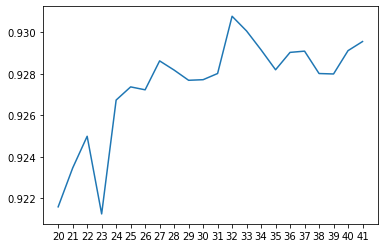

split was accepted
100.0 % modules are more compact than initial structure


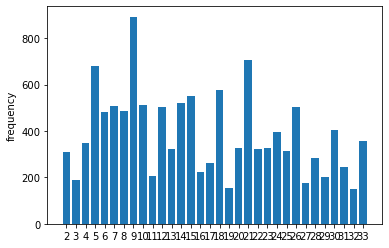

In [3]:
dat = node2vec_recursive_clustering.Node2Vec_Recursive_Clustering()

# set data
dat.set_existing(g,vec_df)

# perform the first step
dat.first_step(alpha=1.0,centrality_centroid=False,do_plot=True,spd_consideration=False,start=20,ns=10)

In [5]:
# obtain the first step result
first_res = dat.get_first_step()

# save the result (you can set this reuslt with 'dat.set_first_step()' and skip the above)
pd.to_pickle(first_res,'C:/github/n2v_rc/sample_data/sample_first_res.pkl')

In [6]:
# move on to the recursive clstering step
dat.recursive_step(min_threshold=20,rich_threshold=0.8,min_q=0.4,do_plot=False,centrality_centroid=False,ns=5)

2 3 4 5 6 7 8 9 10 11 12 13 14 
--- K-Means with Q ---
sub graph nodes : 310
sub graph edges : 740
best split number : 10
its modularity (Q) : 0.7138386713715574
rich children ratio : 0.7
split was terminated (rich ratio or Q problem)

2 3 4 5 6 7 8 9 10 11 12 
--- K-Means with Q ---
sub graph nodes : 187
sub graph edges : 453
best split number : 8
its modularity (Q) : 0.6780446906896153
rich children ratio : 0.625
split was terminated (rich ratio or Q problem)

2 3 4 5 6 7 8 9 10 11 12 13 14 
--- K-Means with Q ---
sub graph nodes : 349
sub graph edges : 871
best split number : 10
its modularity (Q) : 0.7073291168475921
rich children ratio : 0.8
split was accepted

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 
--- K-Means with Q ---
sub graph nodes : 678
sub graph edges : 1658
best split number : 14
its modularity (Q) : 0.8022543709989931
rich children ratio : 1.0
split was accepted

2 3 4 5 6 7 8 9 10 11 
--- K-Means with Q ---
sub graph nodes : 483
sub graph edges : 1183
best split nu

In [11]:
# summarize the result
dat.summarize_module()

# obtain dataframe contains module information
module_df = dat.get_module()
print(module_df.head(5))

  module_0 module_1 module_2   module_3 module_4   module_5 module_6  \
0  UGT2B17   NDUFB6    IFNA7  RN7SKP150    GNRH1     ZNF614    ARAP3   
1    S1PR4      DCK  CYP4A11    CHRNA10    NXPE3   ERC2-IT1    LRRC2   
2     MUL1    ARMC1  MAP3K10       PIGR  EPB41L1      LMTK2    GNG12   
3   SCNN1A      STS    KRT83      TEX15    PEX5L      RAB6A  FAM168A   
4     AZU1    EIF1B    GPR87      HBBP1     MYF6  LRRC37A4P    HOXC4   

   module_7 module_8  module_9  ... module_207 module_208 module_209  \
0  C22orf46  TBC1D13     RPL18  ...      CXXC1       CSN3     PTPN12   
1      EGFR    PCBD1  RPS15AP1  ...      KRT31      PIAS2      DUOX1   
2     MOCS1     ARG2     MATN1  ...    PLEKHM2      SIRPG      EPHB4   
3     KCNV2     KRAS     RPL12  ...      STK25    SLC18A2      ASCC1   
4     PCDH9   RAD51B     RPL35  ...      UEVLD      CAPZB      PCSK5   

  module_210 module_211 module_212 module_213 module_214 module_215 module_216  
0      HCFC2     FBXO28      RRP15      IKBKG     AKA

In [12]:
# save result
module_df.to_csv('C:/github/n2v_rc/sample_data/sample_module_df.csv')